In [26]:
!pip install dash

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import html, Input, Output
from dash import dcc
import threading
from google.colab import output, drive

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df_covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projekt końcowy/project_1_python.csv')
df_covid = pd.DataFrame(df_covid)
df_covid.head()

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [30]:
df_population = df_covid[['location', 'population']].drop_duplicates()

In [31]:
df_population = df_population.sort_values(by='population', ascending=False).head(15)

[Text(0, 0, 'China'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Bangladesh'),
 Text(8, 0, 'Russia'),
 Text(9, 0, 'Mexico'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Ethiopia'),
 Text(12, 0, 'Philippines'),
 Text(13, 0, 'Egypt'),
 Text(14, 0, 'Vietnam')]

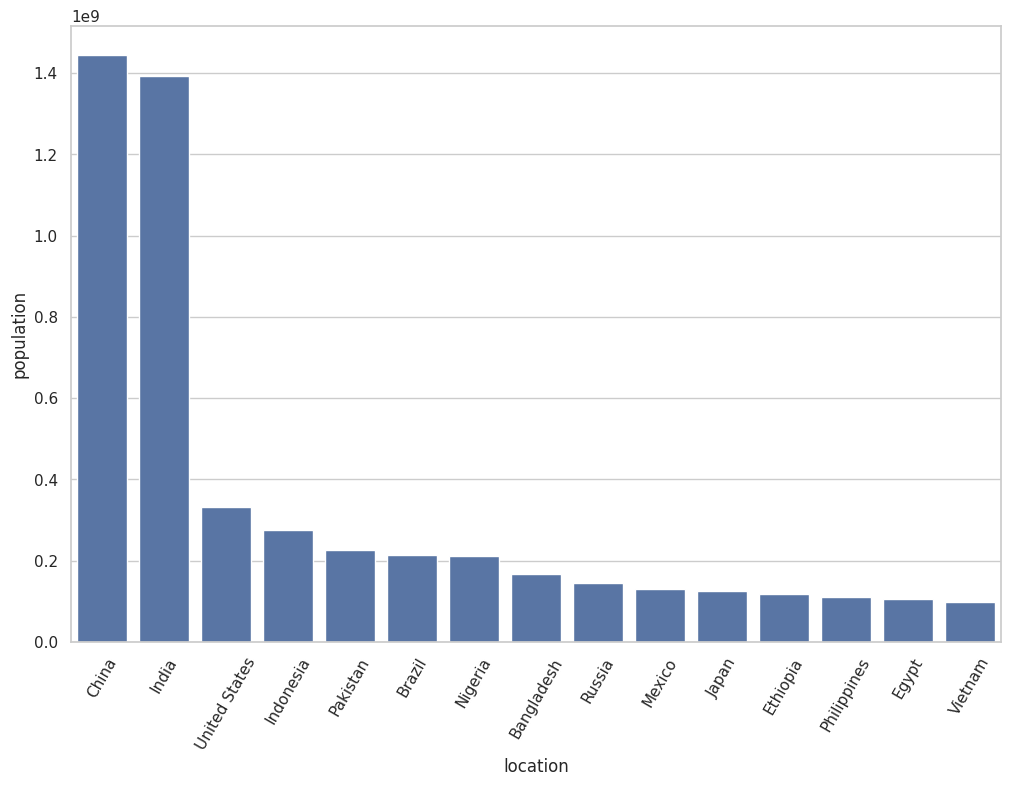

In [32]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
population_chart = sns.barplot(x='location', y='population', data=df_population)
population_chart.set_xticks(range(len(df_population['location'])))
population_chart.set_xticklabels(df_population['location'], rotation=60)


In [33]:
#population vs. life expectancy
df_population_lifeexp = df_covid[['location', 'continent', 'population', 'life_expectancy']].drop_duplicates()

In [34]:
plt.figure(figsize=(12,8))
px.scatter(data_frame=df_population_lifeexp, x='population', y='life_expectancy', color='continent',
           title='Population vs. life expectancy', log_x=True, color_discrete_sequence=px.colors.qualitative.Prism)



<Figure size 1200x800 with 0 Axes>

In [35]:
# number of diagnosed cases
df_covid.head()
df_new_cases = df_covid[['new_cases', 'location', 'date']].drop_duplicates()
df_new_cases.head()

,new_cases,location,date
0,5.0,Afghanistan,2020-02-24
1,0.0,Afghanistan,2020-02-25
2,0.0,Afghanistan,2020-02-26
3,0.0,Afghanistan,2020-02-27
4,0.0,Afghanistan,2020-02-28


In [36]:
px.line(data_frame=df_new_cases, x='date', y='new_cases', color='location',
        color_discrete_sequence=px.colors.qualitative.T10, title='Number of newly diagnosed cases')

Output hidden; open in https://colab.research.google.com to view.

In [37]:
df_covid['cases_to_population'] = df_covid['total_cases'] / df_covid['population']
df_covid.head()

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude,cases_to_population
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,1.255164e-07
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,1.255164e-07
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,1.255164e-07
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,1.255164e-07
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,1.255164e-07


In [38]:
# Removing countries that have missing data
df_covid = df_covid.dropna(subset=['latitude', 'longitude', 'total_cases', 'population', 'continent'])

In [39]:
# map
df_total_cases = df_covid[['total_cases', 'latitude', 'longitude', 'continent', 'population', 'cases_to_population', 'location']].drop_duplicates()
df_total_cases.head()

,total_cases,latitude,longitude,continent,population,cases_to_population,location
0,5.0,33.0,65.0,Asia,39835428.0,1.255164e-07,Afghanistan
12,8.0,33.0,65.0,Asia,39835428.0,2.008263e-07,Afghanistan
16,11.0,33.0,65.0,Asia,39835428.0,2.761361e-07,Afghanistan
19,14.0,33.0,65.0,Asia,39835428.0,3.514460e-07,Afghanistan
20,20.0,33.0,65.0,Asia,39835428.0,5.020656e-07,Afghanistan


In [40]:
fig1 = px.line(data_frame=df_covid, x='date', y='total_cases', color='location', title='Cumulative cases over time')
fig1.show()

Output hidden; open in https://colab.research.google.com to view.

In [41]:
fig2 = px.line(data_frame=df_covid, x='date', y='total_deaths', color='location', title='Cumulative number of deaths over time')
fig2.show()

Output hidden; open in https://colab.research.google.com to view.

In [42]:
# dashboard 1
df_dash_1 = df_covid
countries_list = list(df_dash_1['location'].drop_duplicates())

first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country',
        options=[{'value': str(country), 'label': country}
                 for country in countries_list],
        value=countries_list[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])

])

In [43]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig

In [44]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig


In [45]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_iframe(port=8050)


<IPython.core.display.Javascript object>